**Домашнее** задание
Чем лучше бустить? Тестируем алгоритмы бустинга в бою. 

Цель:
В этом домашнем задании вам предстоит провести детективную работу и узнать, какой же алгоритм бустинга работает лучше всего (конечно, применительно к конкретной задаче)

Часть 1. EDA
Выберите любой интересующий вас датасет по классификации или регрессии (можно взять из рекозитория https://archive.ics.uci.edu/ml/datasets.php, еще неплохие и востребованные на практике варианты - предсказание оттока пользователей https://www.kaggle.com/blastchar/telco-customer-churn или предсказание Customer Livetime Value (CLV или LTV) - https://www.kaggle.com/pankajjsh06/ibm-watson-marketing-customer-value-data
По выбранному датасету проведите EDA, познакомьтесь с признаками, посмотрите зависимости и т.д.


Часть 2. Preprocessing & Feature Engineering

Хотя цель этого задания - посмотреть на работу алгоритмов, тем не менее пропускать препроцессинг нельзя :)
Так что переведите категориальные переменные в уникальные лейблы при помощи LabelEncoder, попробуйте добавить новые переменные и выкинуть лишние и, наконец, разбейте данные на train-test


Часть 3. Who's the mightiest of them all?

Постройте 4 варианта градиентного бустинга, используя значения гиперпараметров “из коробки”: реализация из sklearn, XGBoost, CatBoost, LightGBM
Проверьте качество на отложенной выборке, кто пока лидирует?
Теперь проведите настройку гиперпараметров моделей на кросс-валидации, можно настраивать только самые основные гиперпараметры - число итераций бустинга, max_features, subsample и т.д.
Снова проверьте качество уже настроенных моделей, кто, в итоге победил?
Критерии оценки:
EDA для выбранного датасета - 1 балл
Preprocessing - 1 балл
Построение моделей из коробки и проверка качества - 4 балла
Настройка гиперпараметров моделей и проверка качества - 4 балла

Рекомендуем сдать до: 10.01.2022

# Часть 1. exploratory data analysis EDA
https://www.kaggle.com/blastchar/telco-customer-churn 
По выбранному датасету проведите EDA, познакомьтесь с признаками, посмотрите зависимости и т.д.

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import numpy as np
#import numpy.linalg as la
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
#from matplotlib import cm
#from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import mean_squared_error
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")
#import matplotlib.pyplot as plt


#from optimize_dataframe import optimize_dataframe
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(data.shape,type(data))
print('total num of Nan = ',data.isna().sum().sum())

(7043, 21) <class 'pandas.core.frame.DataFrame'>
total num of Nan =  0


In [205]:
def safe_float(default, *args):
    try:
        return float(*args)
    except:
        return default
        
teeee=[safe_float(0.0,x) for x in data.TotalCharges.values]
data['TotalCharges']=teeee
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [206]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [9]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder(dtype=np.int8)
objectsInDF=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','TotalCharges','Churn']
objectsToTransform=['Churn']
data[objectsToTransform] = enc.fit_transform(data[objectsToTransform])


В данных найдены несколько наиболее важных фич. Степень отказа Churn сильно коррелирует с различными видами Contract и PaymentMethod. Внутри 12 разбиений построены распределения для InternetService

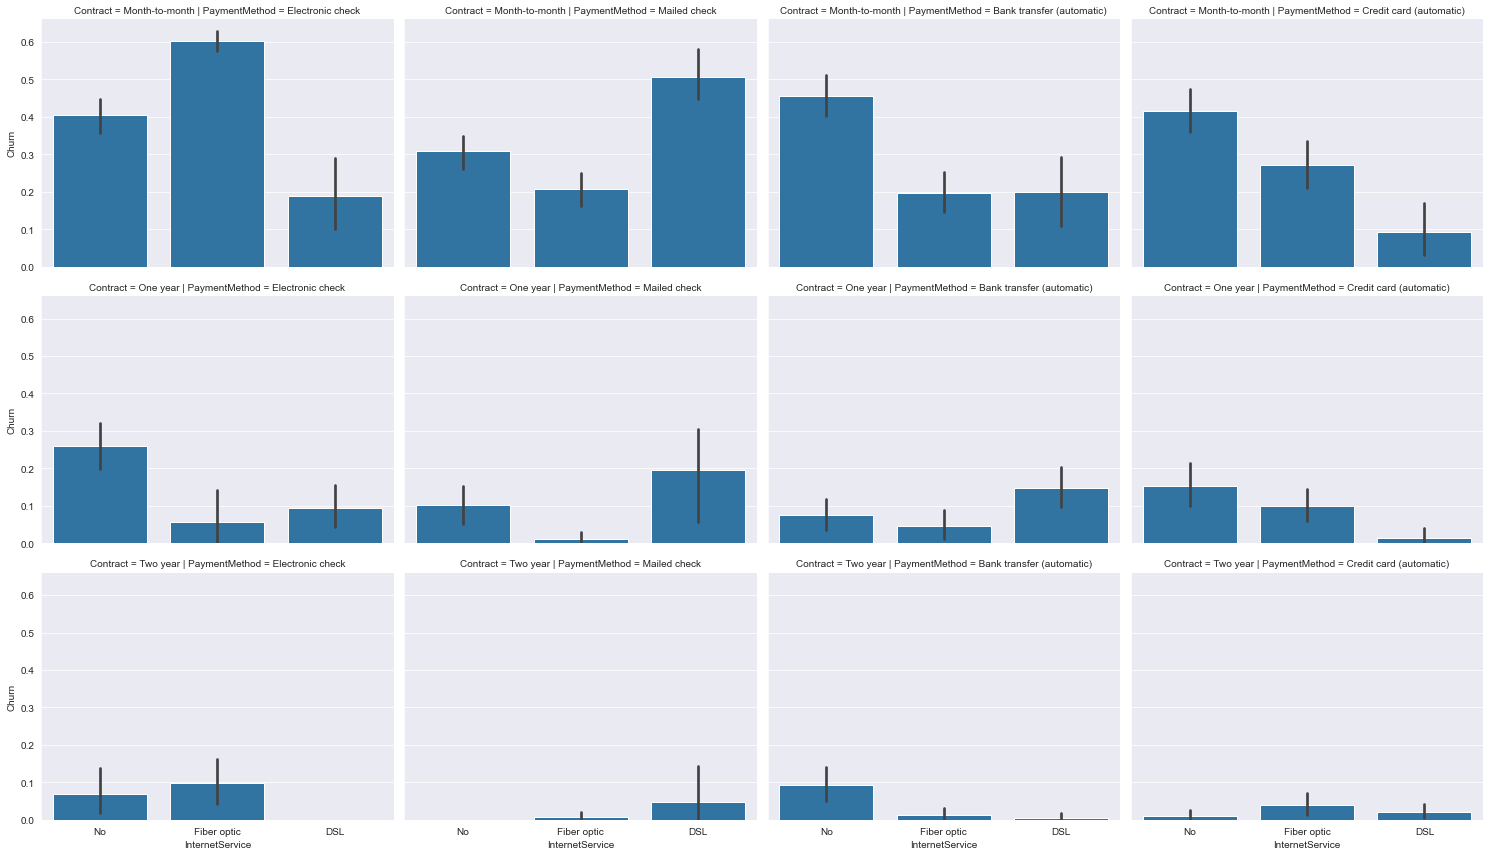

In [10]:
g = sns.FacetGrid(data, col="PaymentMethod", row='Contract',height=4, aspect=1.3)
g.map(sns.barplot, "InternetService", "Churn")

## `Для Contract отдельные распределения` - влияние сильное




<AxesSubplot:xlabel='Contract', ylabel='Churn'>

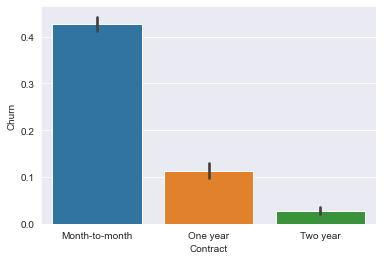

In [11]:
sns.barplot(x='Contract', y='Churn', data=data)

`Для SeniorCitizen отдельные распределения`

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Churn'>

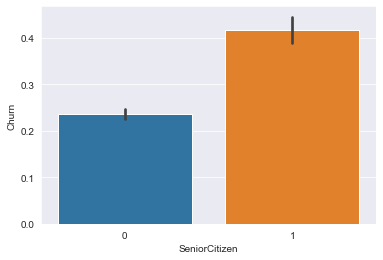

In [12]:
sns.barplot(x='SeniorCitizen', y='Churn', data=data)

Для gender распределения при различных Contract  - Слабое влияние

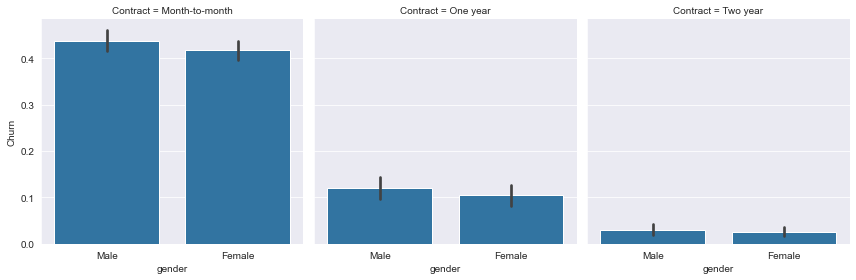

In [13]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "gender", "Churn")

Для Partner распределения при различных Contract - Слабое влияние

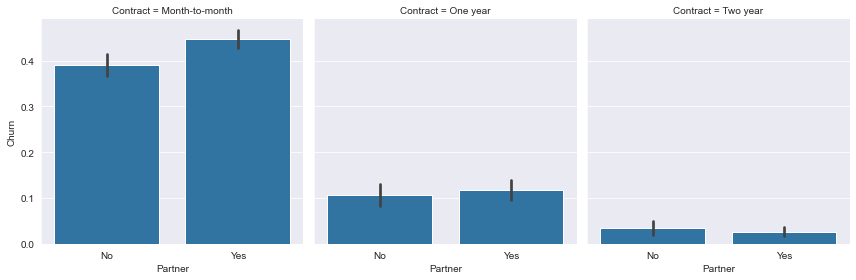

In [14]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "Partner", "Churn")

Для Dependents распределения при различных Contract наличие влияния есть, но оно меньше чем у других

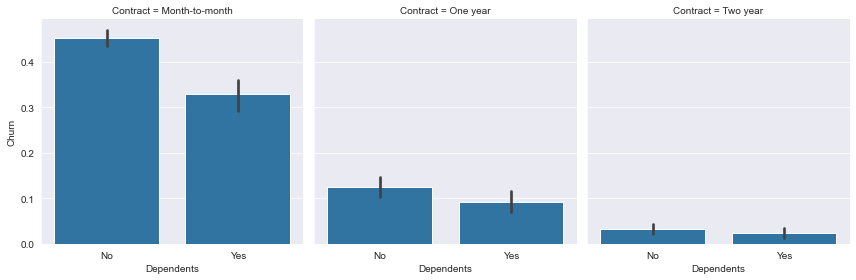

In [15]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "Dependents", "Churn")

Для PhoneService распределения при различных Contract влияние есть - в основном на разброс

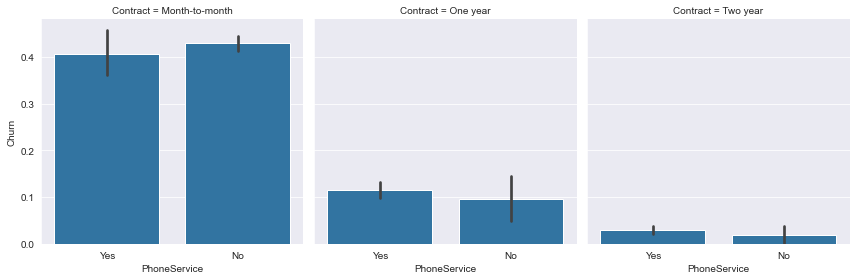

In [16]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "PhoneService", "Churn")

Для MultipleLines распределения при различных Contract - заметное **влияние**

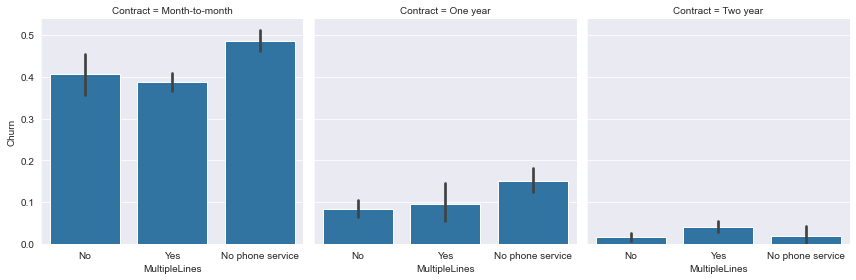

In [17]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "MultipleLines", "Churn")

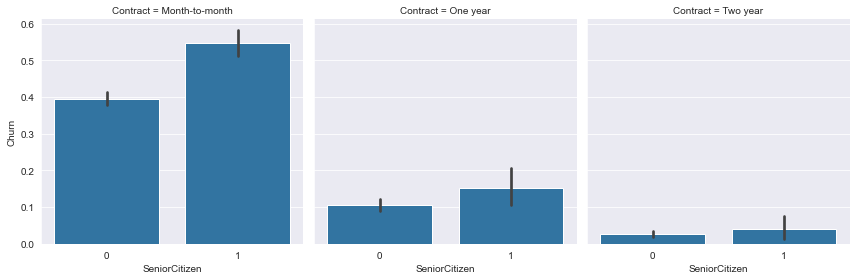

In [18]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "SeniorCitizen", "Churn")

Распределения по средним tenure при различных Churn и contract. 
Кажется по tenure не определишь Churn...

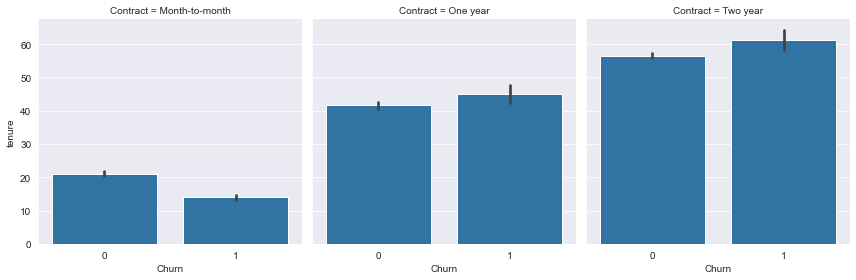

In [19]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "Churn",'tenure')

Распределения tenure при различных contract. Просто интересные

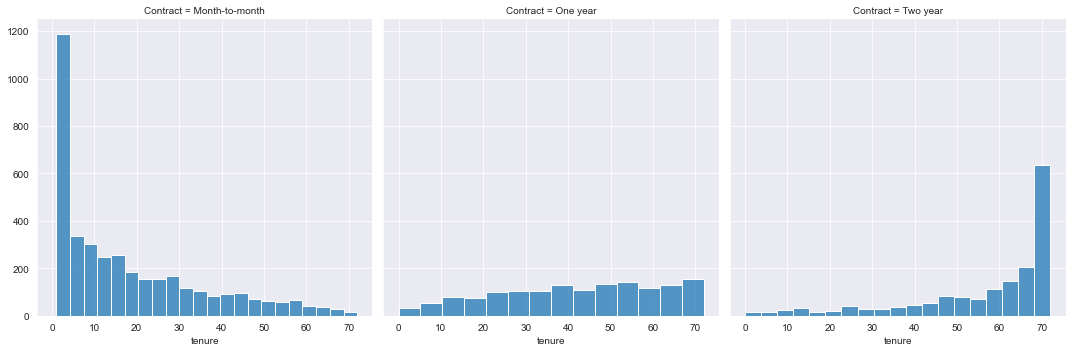

In [20]:
g = sns.FacetGrid(data, col="Contract", height=5, aspect=1.0)
g.map(sns.histplot,'tenure')

Распределения tenure при различных Churn

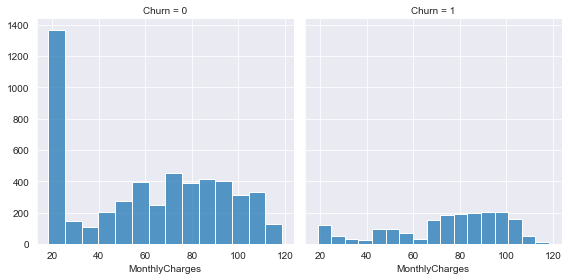

In [21]:
g = sns.FacetGrid(data, col="Churn", height=4, aspect=1.0)
g.map(sns.histplot,'MonthlyCharges')

TechSupport важный показатель - распределение при различных Contract

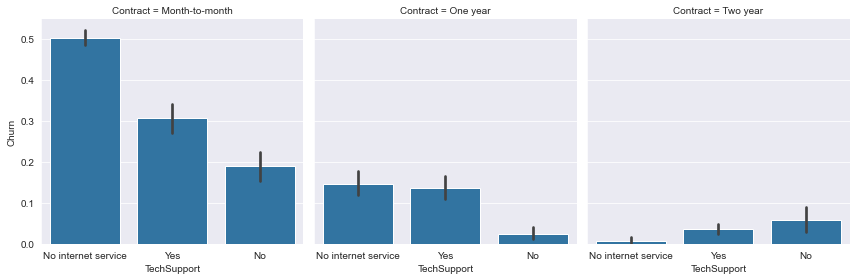

In [22]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "TechSupport", "Churn")

PhoneService слабо влияет - распределение при различных Contract

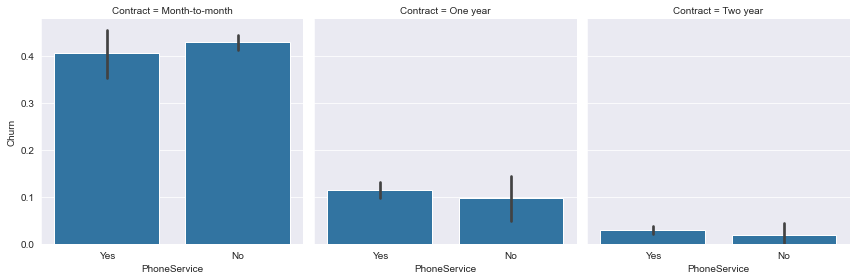

In [23]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "PhoneService", "Churn")

MultipleLines заметно влияет на Churn - распределение при различных Contract

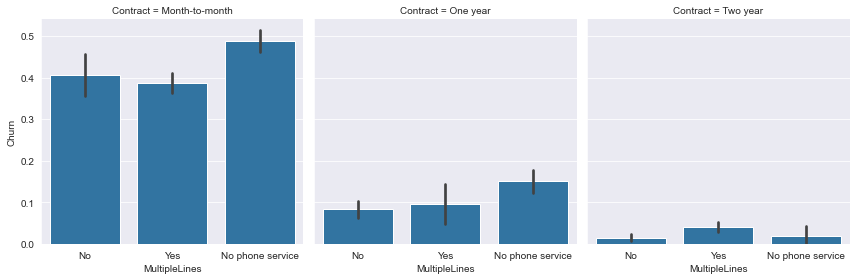

In [24]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "MultipleLines", "Churn")

InternetService важный показатель - распределение при различных Contract

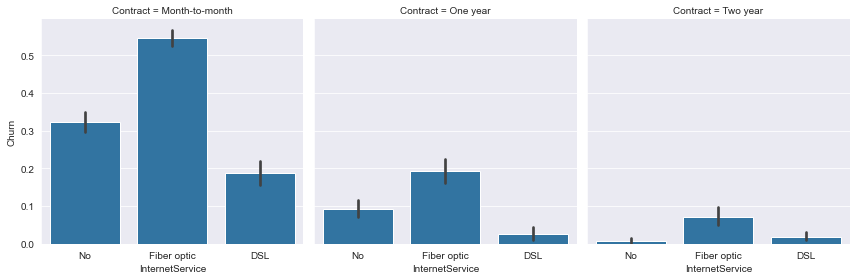

In [25]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "InternetService", "Churn")

StreamingTV важный показатель - распределение при различных Contract

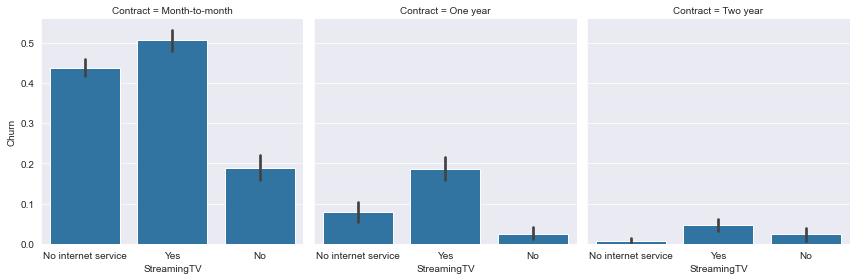

In [26]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "StreamingTV", "Churn")

Streamingmovies очень похож на предыдущий и тоже влияет сильно - распределение при различных Contract

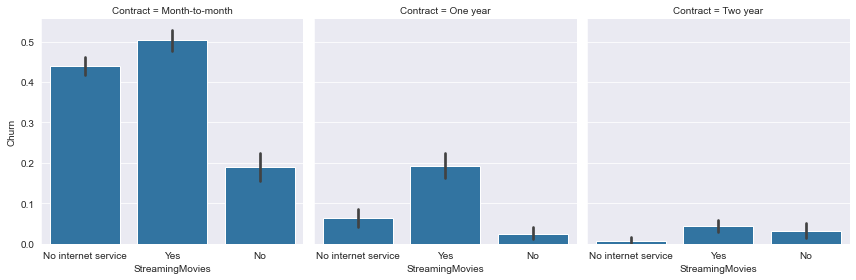

In [27]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "StreamingMovies", "Churn")

PaperlessBilling  влияет сильно - распределение при различных Contract

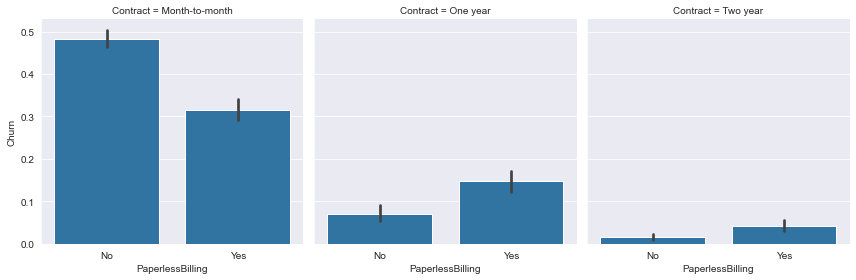

In [28]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "PaperlessBilling", "Churn")

OnlineSecurity  влияет сильно - распределение при различных Contract

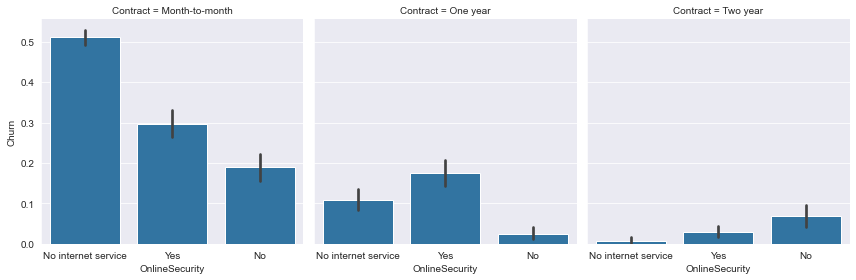

In [29]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "OnlineSecurity", "Churn")

OnlineBackup  влияет сильно - распределение при различных Contract

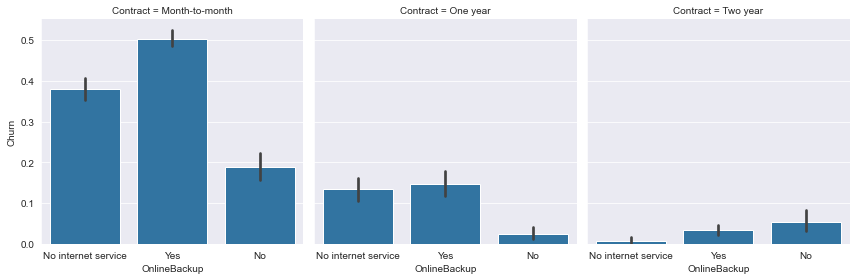

In [30]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "OnlineBackup", "Churn")

DeviceProtection влияет сильно - распределение при различных Contract

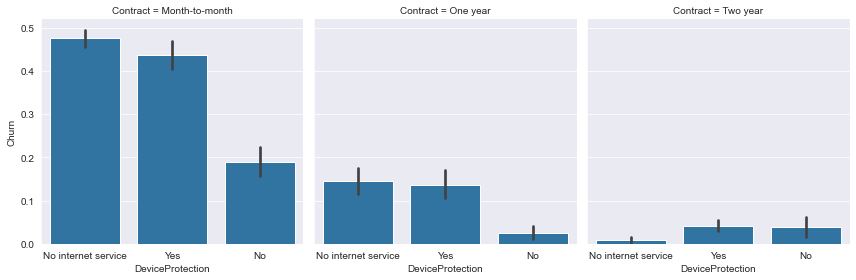

In [31]:
g = sns.FacetGrid(data, col="Contract", height=4, aspect=1.0)
g.map(sns.barplot, "DeviceProtection", "Churn")

# Часть 2. Preprocessing & Feature Engineering

Хотя цель этого задания - посмотреть на работу алгоритмов, тем не менее пропускать препроцессинг нельзя
Так что переведите категориальные переменные в уникальные лейблы при помощи LabelEncoder, попробуйте добавить новые переменные и выкинуть лишние и, наконец, разбейте данные на train-test

**Судя по графикам в части 1 можно удалить фичи customerID, gender, TotalCharges, Partner, PhoneService, StreamingMovies**

In [213]:
dataSmaller=data.drop(columns=['customerID','gender', 'Partner','TotalCharges','PhoneService','StreamingMovies'])

In [33]:
from sklearn import preprocessing
le1=preprocessing.LabelEncoder()
dataSmaller['Dependents']=le1.fit_transform(dataSmaller.Dependents.values)
le3=preprocessing.LabelEncoder()
dataSmaller['MultipleLines']=le3.fit_transform(dataSmaller.MultipleLines.values)
le4=preprocessing.LabelEncoder()
dataSmaller['InternetService']=le4.fit_transform(dataSmaller.InternetService.values)
le5=preprocessing.LabelEncoder()
dataSmaller['OnlineSecurity']=le5.fit_transform(dataSmaller.OnlineSecurity.values)
le6=preprocessing.LabelEncoder()
dataSmaller['OnlineBackup']=le6.fit_transform(dataSmaller.OnlineBackup.values)
le7=preprocessing.LabelEncoder()
dataSmaller['DeviceProtection']=le7.fit_transform(dataSmaller.DeviceProtection.values)
le8=preprocessing.LabelEncoder()
dataSmaller['TechSupport']=le8.fit_transform(dataSmaller.TechSupport.values)
le9=preprocessing.LabelEncoder()
dataSmaller['StreamingTV']=le9.fit_transform(dataSmaller.StreamingTV.values)
le11=preprocessing.LabelEncoder()
dataSmaller['Contract']=le11.fit_transform(dataSmaller.Contract.values)
le12=preprocessing.LabelEncoder()
dataSmaller['PaperlessBilling']=le12.fit_transform(dataSmaller.PaperlessBilling.values)
le13=preprocessing.LabelEncoder()
dataSmaller['PaymentMethod']=le13.fit_transform(dataSmaller.PaymentMethod.values)

In [34]:
dataEvenSmaller=dataSmaller.astype({'SeniorCitizen':'int8',\
'Dependents':'int8',\
'MultipleLines':'int8',\
'InternetService':'int8',\
'OnlineSecurity':'int8',\
'OnlineBackup':'int8',\
'DeviceProtection':'int8',\
'TechSupport':'int8',\
'StreamingTV':'int8',\
'Contract':'int8',\
'PaperlessBilling':'int8',\
'PaymentMethod':'int8',\
'MonthlyCharges':'float16'})

In [36]:
from sklearn.model_selection import train_test_split
X=dataEvenSmaller.drop('Churn', axis=1)
Y=dataEvenSmaller.Churn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

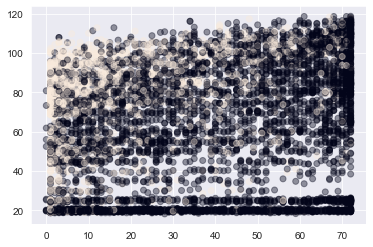

In [37]:
xx=dataEvenSmaller["tenure"].values
yy=dataEvenSmaller["MonthlyCharges"].values
zz=dataEvenSmaller.Churn.values
plt.scatter(xx,yy, c=zz,alpha=0.4)

# Часть 3. Who's the mightiest of them all?

Постройте 4 варианта градиентного бустинга, используя значения гиперпараметров “из коробки”: реализация из sklearn, XGBoost, CatBoost, LightGBM Проверьте качество на отложенной выборке, кто пока лидирует? Теперь проведите настройку гиперпараметров моделей на кросс-валидации, можно настраивать только самые основные гиперпараметры - число итераций бустинга, max_features, subsample и т.д. 

#Just to try out the data generating DecisionTree model.
The result  is: Accuracy = 79%

In [212]:
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, recall_score
bestTreeAccu=0
bestTreeTime=0
for i in range(2,10):
    t = time.time()
    tree1 = DecisionTreeClassifier(random_state=0, max_depth=i) 
    tree1.fit(X_train, Y_train)
    elapsed = time.time() - t
    tree1_r2 = r2_score(tree1.predict(X_test), Y_test)
    tree1_accuracy = accuracy_score(Y_test,tree1.predict(X_test))
    tree1_recall = recall_score(tree1.predict(X_test),Y_test)
    print(f'depth: {i:d} Accuracy for the model: {tree1_accuracy:.4f} Recall for the model: {tree1_recall:.4f} R2 for the model: {tree1_r2:.4f}')
    if tree1_accuracy > bestTreeAccu:
        bestTreeAccu=tree1_accuracy
        bestTreeTime=elapsed
  


depth: 2 Accuracy for the model: 0.7282 Recall for the model: 0.4828 R2 for the model: -0.1637
depth: 3 Accuracy for the model: 0.7686 Recall for the model: 0.6021 R2 for the model: -0.9745
depth: 4 Accuracy for the model: 0.7722 Recall for the model: 0.6068 R2 for the model: -0.8251
depth: 5 Accuracy for the model: 0.7906 Recall for the model: 0.6326 R2 for the model: -0.3751
depth: 6 Accuracy for the model: 0.7906 Recall for the model: 0.6446 R2 for the model: -0.4718
depth: 7 Accuracy for the model: 0.7764 Recall for the model: 0.5786 R2 for the model: -0.2793
depth: 8 Accuracy for the model: 0.7651 Recall for the model: 0.5512 R2 for the model: -0.3043
depth: 9 Accuracy for the model: 0.7580 Recall for the model: 0.5347 R2 for the model: -0.3063


In [210]:
#!pip install catboost

#Simple comparison of GB models

In [42]:
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier, metrics

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

In [37]:
XGB_params ={'max_depth': 2,'learning_rate': 0.3,'seed': 42,'n_estimators': 30,'nthread': 4,'objective': 'binary:logistic'}
sklearn_params = {'n_estimators': 30, 'max_depth': 2}
LGBM_params={'n_estimators': 30, 'max_depth': 2,'num_leaves': 333,'objective': 'binary'}
CatB_params={'iterations': 500,"depth":2,    'learning_rate': 0.3,    'eval_metric': metrics.Accuracy(),    'random_seed': 42,    'logging_level': 'Silent',    'use_best_model': False}

xgb_1 = list()
lgbm_t = list()
sklearn_t = list()
catb_t = list()

accu_xgb_1 = list()
accu_lgbm = list()
accu_sklearn = list()
accu_catb = list()

max_estimators = 100
min_estimators = 1
step_e=4
for i_est in range(min_estimators,max_estimators,step_e):

    XGB_params['n_estimators']=i_est
    sklearn_params['n_estimators']=i_est
    LGBM_params['n_estimators']=i_est
    LGBM_params['num_leaves']=i_est*4
    CatB_params['iterations']=i_est

    t = time.time()
    xgbM = XGBClassifier(**XGB_params)
    xgbM.fit(X_train, Y_train)
    elapsed = time.time() - t
    xgb_1.append(elapsed)
    err=accuracy_score(xgbM.predict(X_test),Y_test)
    accu_xgb_1.append(err)

    t = time.time()
    clf = GradientBoostingClassifier(**sklearn_params).fit(X_train, Y_train)
    elapsed = time.time() - t
    sklearn_t.append(elapsed)
    err=accuracy_score(clf.predict(X_test),Y_test)
    accu_sklearn.append(err)

    t = time.time()
    lgbm = LGBMClassifier(**LGBM_params)
    lgbm.fit(X_train, Y_train)
    elapsed = time.time() - t
    lgbm_t.append(elapsed)
    yhat = lgbm.predict(X_test)
    err=accuracy_score(yhat,Y_test)
    accu_lgbm.append(err)

    t = time.time()
    CatBoostModel = CatBoostClassifier(**CatB_params)
    CatBoostModel.fit(X_train, Y_train)
    elapsed = time.time() - t
    catb_t.append(elapsed)
    yhat = lgbm.predict(X_test)
    err=accuracy_score(yhat,Y_test)
    accu_catb.append(err)



**Скорость обучения моделей в зависимости от количества деревьев в последовательности**

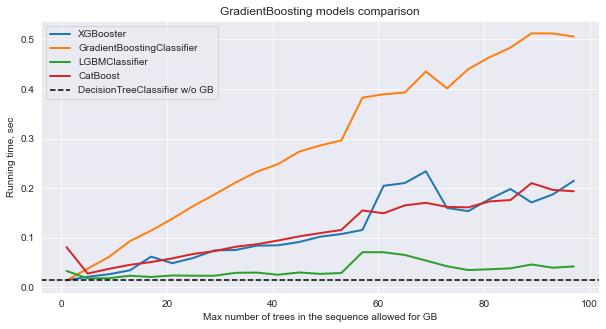

Fastest is LGBMClassifier. CatBoost is 2nd fast and is 3.29 slower. 
XGBooster is 3.25 slower. 
GradientBoostingClassifier is the slowest and it's 8.13 slower


In [38]:
%matplotlib  inline
import matplotlib.pyplot as plt
allX=[]
for i_est in range(min_estimators,max_estimators,step_e):
    allX.append(i_est)
plt.figure(figsize=(10, 5))
plt.plot(allX,xgb_1, label='XGBooster', lw=2)
plt.plot(allX,sklearn_t, label='GradientBoostingClassifier', lw=2)
plt.plot(allX,lgbm_t, label='LGBMClassifier', lw=2)
plt.plot(allX,catb_t, label='CatBoost', lw=2)
plt.axhline(y=bestTreeTime, color='k', ls='dashed',label='DecisionTreeClassifier w/o GB')

plt.legend(loc='best')
plt.xlabel('Max number of trees in the sequence allowed for GB')
plt.ylabel('Running time, sec')
plt.title('GradientBoosting models comparison')
plt.show()

mean_time1 = np.mean(xgb_1)
mean_time2 = np.mean(sklearn_t)
mean_time3 = np.mean(lgbm_t)
mean_time4 = np.mean(catb_t)
AAAA1=(mean_time4/mean_time3)
AAAA2=(mean_time1/mean_time3)
AAAA3=(mean_time2/mean_time3)

print("Fastest is LGBMClassifier. CatBoost is 2nd fast and is {0:.2f} slower. \nXGBooster is {1:.2f} slower. \nGradientBoostingClassifier is the slowest and it's {2:.2f} slower".format(AAAA1,AAAA2,AAAA3))


With default choice of hyperparameters the LGBMClassifier was the fastest, and the slowest was GradientBoostingClassifier

**Точность обучения моделей (Accuracy) в зависимости от количества деревьев в последовательности**

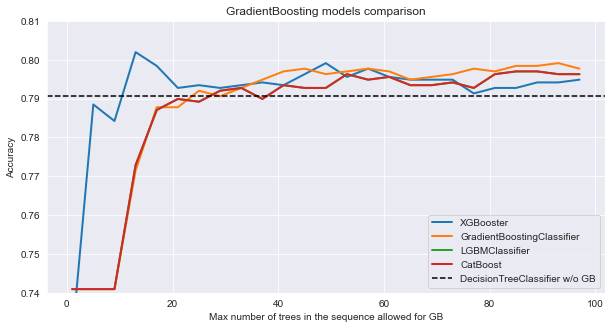

Accuracy is relatively similar and it's a bit higher than what we got with Decision Tree


In [39]:
plt.figure(figsize=(10, 5))
plt.plot(allX,accu_xgb_1, label='XGBooster', lw=2)
plt.plot(allX,accu_sklearn, label='GradientBoostingClassifier', lw=2)
plt.plot(allX,accu_lgbm, label='LGBMClassifier', lw=2)
plt.plot(allX,accu_catb, label='CatBoost', lw=2)

plt.axhline(y=bestTreeAccu, color='k', ls='dashed',label='DecisionTreeClassifier w/o GB')
plt.legend(loc='best')
plt.xlabel('Max number of trees in the sequence allowed for GB')
plt.ylabel('Accuracy')
plt.ylim(0.74, 0.81)
plt.title('GradientBoosting models comparison')
plt.show()
print("Accuracy is relatively similar and it's a bit higher than what we got with Decision Tree")


In [171]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
Global_Max_evals=int((7.0**4)/10.0)


#XGBClassifier cross validation and optimisation

In [172]:
XGB_params ={'max_depth': 2,'learning_rate': 0.3,'seed': 42,'n_estimators': 30,'nthread': 4,'objective': 'binary:logistic'}

X=dataEvenSmaller.drop('Churn', axis=1)
y=dataEvenSmaller.Churn

n_estimators_range = np.linspace(1, 150, 15).astype('int')

XGBtrain_scores, XGBtest_scores = validation_curve(
    XGBClassifier(**XGB_params),
    X, y,
    param_name = 'n_estimators',
    param_range = n_estimators_range,
    cv=cv.split(X, y),
    scoring='accuracy',
    n_jobs=-1
)

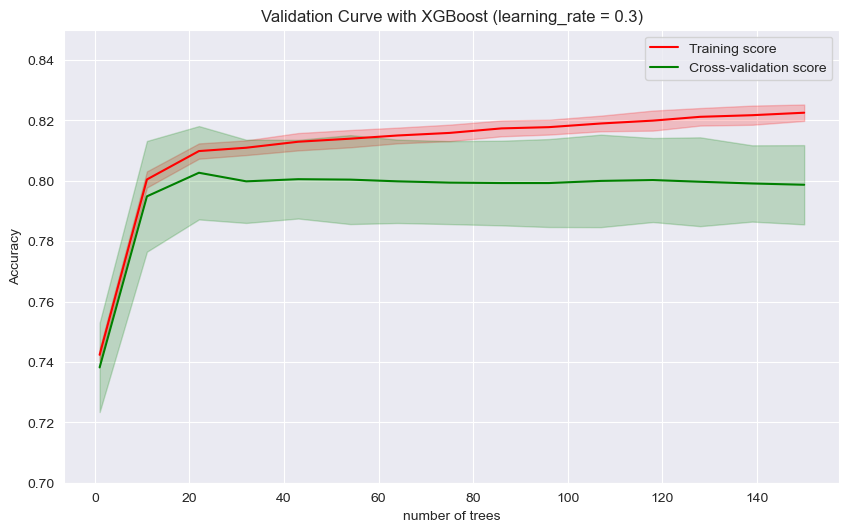

Best cross-validation result (0.80) obtained for 22 trees


In [173]:
train_scores_mean = np.mean(XGBtrain_scores, axis=1)
train_scores_std = np.std(XGBtrain_scores, axis=1)
test_scores_mean = np.mean(XGBtest_scores, axis=1)
test_scores_std = np.std(XGBtest_scores, axis=1)

fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with XGBoost (learning_rate = 0.3)")
plt.xlabel("number of trees")
plt.ylabel("Accuracy")
plt.ylim(0.70, 0.85)

plt.plot(n_estimators_range,
             train_scores_mean,
             label="Training score",
             color="r")

plt.plot(n_estimators_range,
             test_scores_mean, 
             label="Cross-validation score",
             color="g")

plt.fill_between(n_estimators_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, color="r")

plt.fill_between(n_estimators_range,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2, color="g")

plt.axhline(y=1, color='k', ls='dashed')

plt.legend(loc="best")
plt.show()

i = np.argmax(test_scores_mean)
print("Best cross-validation result ({0:.2f}) obtained for {1} trees".format(test_scores_mean[i], n_estimators_range[i]))

In [174]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
import math

In [175]:
X=dataEvenSmaller.drop('Churn', axis=1)
y=dataEvenSmaller.Churn

def hyperparameter_tuning(params):
    clf = XGBClassifier(**params)
    acc = cross_val_score(clf, X, y, scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [176]:
EstimatorsRange=[5, 10, 40, 70,114,140,170,200]
maxDepthRange=np.arange(1, 10, 3, dtype=int)

space = {
    "n_estimators": hp.choice("n_estimators", EstimatorsRange),
    "learning_rate": hp.quniform("learning_rate", 0.01, 0.4, 0.03),
    "subsample": hp.quniform("subsample", 0.4, 1.0, 0.2),
    "max_depth": hp.choice("max_depth",maxDepthRange),
    'nthread': 4
}
trials = Trials()

t = time.time()
best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=Global_Max_evals, 
    trials=trials
)
elapsed = time.time() - t
    
print("Result of the First round of optimisation:")
print("Best: {}".format(best))

print("learning_rate:",best["learning_rate"])
print("n_estimators:",EstimatorsRange[best["n_estimators"]])
print("subsample:",   best["subsample"])
print("max_depth:",   maxDepthRange[best["max_depth"]])
print("in time = {0:.2f} seconds".format(elapsed))
print("Accuracy = {0:.4f}".format(-np.min([x for x in trials.losses() if math.isnan(x) == False])))

100%|██████████| 240/240 [05:53<00:00,  1.47s/trial, best loss: -0.8064751153300213]
Result of the First round of optimisation:
Best: {'learning_rate': 0.09, 'max_depth': 0, 'n_estimators': 7, 'subsample': 0.8}
learning_rate: 0.09
n_estimators: 200
subsample: 0.8
max_depth: 1
in time = 354.01 seconds
Accuracy = 0.8065


In [177]:
calcRoundTwo=[0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
EstimatorsRangeTwo=[int(x * EstimatorsRange[best["n_estimators"]]) for x in calcRoundTwo]
Learning_rateRangeTwo=[x * best["learning_rate"] for x in calcRoundTwo]
SubsampleRangeTwo=[x * best["subsample"] for x in calcRoundTwo]

maxDepthRangeTwo=[int(x * maxDepthRange[best["max_depth"]]) for x in calcRoundTwo]
maxDepthRangeTwo=[x+1 if np.min(maxDepthRangeTwo) == 0 else x for x in maxDepthRangeTwo]
maxDepthRangeTwo = list(dict.fromkeys(maxDepthRangeTwo))

print("n_estimators",EstimatorsRangeTwo,  "\nlearning_rate",Learning_rateRangeTwo,
      "\nsubsample",SubsampleRangeTwo,   "\nmax_depth",maxDepthRangeTwo)

n_estimators [140, 160, 180, 200, 220, 240, 260] 
learning_rate [0.063, 0.072, 0.081, 0.09, 0.099, 0.108, 0.11699999999999999] 
subsample [0.5599999999999999, 0.6400000000000001, 0.7200000000000001, 0.8, 0.8800000000000001, 0.96, 1.04] 
max_depth [1, 2]


In [178]:
space = {
    "n_estimators": hp.choice("n_estimators", EstimatorsRangeTwo),
    "learning_rate": hp.choice("learning_rate", Learning_rateRangeTwo),
    "subsample": hp.choice("subsample", SubsampleRangeTwo),
    "max_depth": hp.choice("max_depth",maxDepthRangeTwo),
}
trials = Trials()

t = time.time()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=Global_Max_evals, 
    trials=trials
)
elapsed = time.time() - t
    
print("Result of the Second round of optimisation\nBest: {}".format(best))

print("learning_rate:",Learning_rateRangeTwo[best["learning_rate"]])
print("n_estimators:",EstimatorsRangeTwo[best["n_estimators"]])
print("subsample:",SubsampleRangeTwo[best["subsample"]])
print("max_depth:",maxDepthRangeTwo[best["max_depth"]])
print("in time = {0:.2f} seconds".format(elapsed))
print("Accuracy = {0:.4f}".format(-np.min([x for x in trials.losses() if math.isnan(x) == False])))

XGBClassifier_otimisation_res={"learning_rate":Learning_rateRangeTwo[best["learning_rate"]],
                        "n_estimators":EstimatorsRangeTwo[best["n_estimators"]],
                        "subsample":SubsampleRangeTwo[best["subsample"]],
                        "max_depth":maxDepthRangeTwo[best["max_depth"]],
                        "Accuracy":-np.min([x for x in trials.losses() if math.isnan(x) == False]),
                        "timeOptimisation":elapsed
                                           }
print(XGBClassifier_otimisation_res)

100%|██████████| 240/240 [01:04<00:00,  3.72trial/s, best loss: -0.8061910244209305]
Result of the Second round of optimisation
Best: {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 4, 'subsample': 2}
learning_rate: 0.072
n_estimators: 220
subsample: 0.7200000000000001
max_depth: 2
in time = 64.47 seconds
Accuracy = 0.8062
{'learning_rate': 0.072, 'n_estimators': 220, 'subsample': 0.7200000000000001, 'max_depth': 2, 'Accuracy': 0.8061910244209305, 'timeOptimisation': 64.46904873847961}


#GradientBoostingClassifier cross validation and optimisation

In [179]:
sklearn_params = {'n_estimators': 30, 'max_depth': 2}

X=dataEvenSmaller.drop('Churn', axis=1)
y=dataEvenSmaller.Churn

n_estimators_range = np.linspace(1, 150, 15).astype('int')

sklearnGBtrain_scores, sklearnGBtest_scores = validation_curve(
    GradientBoostingClassifier(**sklearn_params),
    X, y,
    param_name = 'n_estimators',
    param_range = n_estimators_range,
    cv=cv.split(X, y),
    scoring='accuracy',
    n_jobs=-1
)

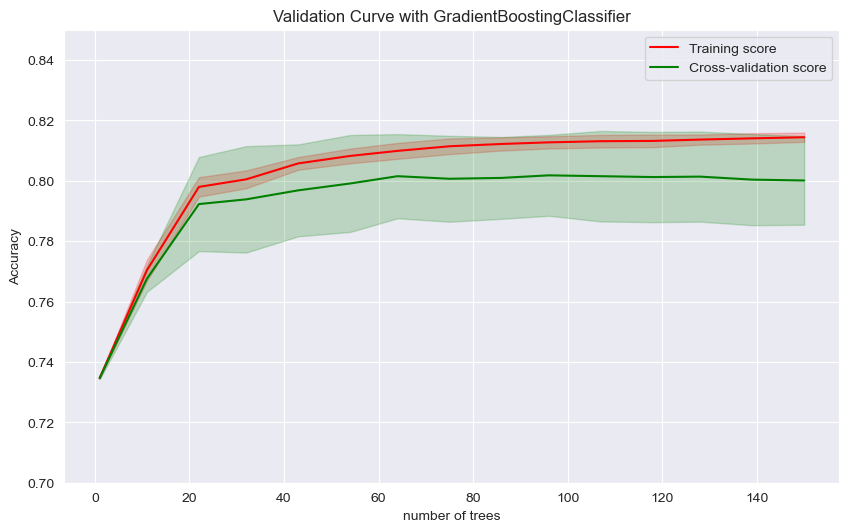

Best cross-validation result (0.80) obtained for 96 trees


In [180]:
train_scores_mean = np.mean(sklearnGBtrain_scores, axis=1)
train_scores_std = np.std (sklearnGBtrain_scores, axis=1)
test_scores_mean = np.mean(sklearnGBtest_scores, axis=1)
test_scores_std = np.std (sklearnGBtest_scores, axis=1)

fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with GradientBoostingClassifier")
plt.xlabel("number of trees")
plt.ylabel("Accuracy")
plt.ylim(0.70, 0.85)

plt.plot(n_estimators_range,
             train_scores_mean,
             label="Training score",
             color="r")

plt.plot(n_estimators_range,
             test_scores_mean, 
             label="Cross-validation score",
             color="g")

plt.fill_between(n_estimators_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, color="r")

plt.fill_between(n_estimators_range,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2, color="g")

plt.axhline(y=1, color='k', ls='dashed')

plt.legend(loc="best")
plt.show()

i = np.argmax(test_scores_mean)
print("Best cross-validation result ({0:.2f}) obtained for {1} trees".format(test_scores_mean[i], n_estimators_range[i]))

In [181]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
import math

In [182]:
X=dataEvenSmaller.drop('Churn', axis=1)
y=dataEvenSmaller.Churn

def hyperparameter_tuning(params):
    clf = GradientBoostingClassifier(**params)
    acc = cross_val_score(clf, X, y, scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [183]:
EstimatorsRange=[5, 10, 40, 70,114,140,170,200]
maxDepthRange=np.arange(1, 10, 3, dtype=int)

space = {
    "n_estimators": hp.choice("n_estimators", EstimatorsRange),
    "learning_rate": hp.quniform("learning_rate", 0.01, 0.4, 0.03),
    "subsample": hp.quniform("subsample", 0.4, 1.0, 0.2),
    "max_depth": hp.choice("max_depth",maxDepthRange),
}

trials = Trials()

t = time.time()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=Global_Max_evals, 
    trials=trials
)
elapsed = time.time() - t
    
print("Result of the First round of optimisation:")
print("Best: {}".format(best))

print("learning_rate:",best["learning_rate"])
print("n_estimators:",EstimatorsRange[best["n_estimators"]])
print("subsample:",best["subsample"])
print("max_depth:",maxDepthRange[best["max_depth"]])
print("in time = {0:.2f} seconds".format(elapsed))
print("Accuracy = {0:.4f}".format(-np.min([x for x in trials.losses() if math.isnan(x) == False])))

100%|██████████| 240/240 [12:55<00:00,  3.23s/trial, best loss: -0.8071842336602362] 
Result of the First round of optimisation:
Best: {'learning_rate': 0.06, 'max_depth': 0, 'n_estimators': 7, 'subsample': 0.4}
learning_rate: 0.06
n_estimators: 200
subsample: 0.4
max_depth: 1
in time = 775.92 seconds
Accuracy = 0.8072


In [184]:
calcRoundTwo=[0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
EstimatorsRangeTwo=[int(x * EstimatorsRange[best["n_estimators"]]) for x in calcRoundTwo]
Learning_rateRangeTwo=[x * best["learning_rate"] for x in calcRoundTwo]
SubsampleRangeTwo=[x * best["subsample"] for x in calcRoundTwo]

maxDepthRangeTwo=[int(x * maxDepthRange[best["max_depth"]]) for x in calcRoundTwo]
maxDepthRangeTwo=[x+1 if np.min(maxDepthRangeTwo) == 0 else x for x in maxDepthRangeTwo]
maxDepthRangeTwo = list(dict.fromkeys(maxDepthRangeTwo))

print("n_estimators",EstimatorsRangeTwo,  "\nlearning_rate",Learning_rateRangeTwo,
      "\nsubsample",SubsampleRangeTwo,   "\nmax_depth",maxDepthRangeTwo)

n_estimators [140, 160, 180, 200, 220, 240, 260] 
learning_rate [0.041999999999999996, 0.048, 0.054, 0.06, 0.066, 0.072, 0.078] 
subsample [0.27999999999999997, 0.32000000000000006, 0.36000000000000004, 0.4, 0.44000000000000006, 0.48, 0.52] 
max_depth [1, 2]


In [185]:
space = {
    "n_estimators": hp.choice("n_estimators", EstimatorsRangeTwo),
    "learning_rate": hp.choice("learning_rate", Learning_rateRangeTwo),
    "subsample": hp.choice("subsample", SubsampleRangeTwo),
    "max_depth": hp.choice("max_depth",maxDepthRangeTwo),
}
trials = Trials()

t = time.time()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=Global_Max_evals, 
    trials=trials
)
elapsed = time.time() - t
    
print("Result of the Second round of optimisation\nBest: {}".format(best))

print("learning_rate:",Learning_rateRangeTwo[best["learning_rate"]])
print("n_estimators:",EstimatorsRangeTwo[best["n_estimators"]])
print("subsample:",SubsampleRangeTwo[best["subsample"]])
print("max_depth:",maxDepthRangeTwo[best["max_depth"]])
print("in time = {0:.2f} seconds".format(elapsed))
print("Accuracy = {0:.4f}".format(-np.min([x for x in trials.losses() if math.isnan(x) == False])))

GradientBoosting_otimisation_res={"learning_rate":Learning_rateRangeTwo[best["learning_rate"]],
                        "n_estimators":EstimatorsRangeTwo[best["n_estimators"]],
                        "subsample":SubsampleRangeTwo[best["subsample"]],
                        "max_depth":maxDepthRangeTwo[best["max_depth"]],
                        "Accuracy":-np.min([x for x in trials.losses() if math.isnan(x) == False]),
                        "timeOptimisation":elapsed
                     }
print(GradientBoosting_otimisation_res)

100%|██████████| 240/240 [14:11<00:00,  3.55s/trial, best loss: -0.8077522138525067]
Result of the Second round of optimisation
Best: {'learning_rate': 4, 'max_depth': 0, 'n_estimators': 2, 'subsample': 2}
learning_rate: 0.066
n_estimators: 180
subsample: 0.36000000000000004
max_depth: 1
in time = 851.82 seconds
Accuracy = 0.8078
{'learning_rate': 0.066, 'n_estimators': 180, 'subsample': 0.36000000000000004, 'max_depth': 1, 'Accuracy': 0.8077522138525067, 'timeOptimisation': 851.8166537284851}


#LGBMClassifier cross validation and optimisation

In [186]:
X=dataEvenSmaller.drop('Churn', axis=1)
y=dataEvenSmaller.Churn

In [187]:
LGBM_params={'n_estimators': 30, 'max_depth': 2,'num_leaves': 333,'objective': 'binary'}
n_estimators_range = np.linspace(1, 200, 15).astype('int')

LGBM_train_scores, LGBM_test_scores = validation_curve(
    LGBMClassifier(**LGBM_params),
    X, y,
    param_name = 'n_estimators',
    param_range = n_estimators_range,
    cv=cv.split(X, y),
    scoring='accuracy',
    n_jobs=-1
)

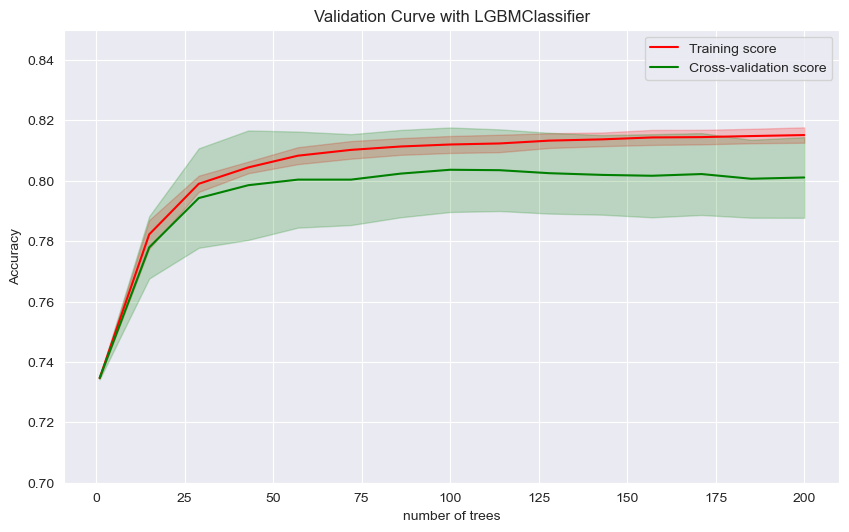

Best cross-validation result (0.80) obtained for 100 trees


In [188]:
train_scores_mean = np.mean(LGBM_train_scores, axis=1)
train_scores_std = np.std (LGBM_train_scores, axis=1)
test_scores_mean = np.mean(LGBM_test_scores, axis=1)
test_scores_std = np.std (LGBM_test_scores, axis=1)

fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with LGBMClassifier")
plt.xlabel("number of trees")
plt.ylabel("Accuracy")
plt.ylim(0.70, 0.85)

plt.plot(n_estimators_range,
             train_scores_mean,
             label="Training score",
             color="r")

plt.plot(n_estimators_range,
             test_scores_mean, 
             label="Cross-validation score",
             color="g")

plt.fill_between(n_estimators_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, color="r")

plt.fill_between(n_estimators_range,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2, color="g")

plt.axhline(y=1, color='k', ls='dashed')

plt.legend(loc="best")
plt.show()

i = np.argmax(test_scores_mean)
print("Best cross-validation result ({0:.2f}) obtained for {1} trees".format(test_scores_mean[i], n_estimators_range[i]))

In [189]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
import math

In [190]:
def hyperparameter_tuning(params):
    clf = LGBMClassifier(**params,n_jobs=-1)
    acc = cross_val_score(clf, X, y, scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [191]:
EstimatorsRange=[5, 10, 40, 70,114,140,170,200]
NumLeavesRange=np.arange(50, 5000, 100, dtype=int)
maxDepthRange=np.arange(1, 30, 3, dtype=int)
space = {
    "n_estimators": hp.choice("n_estimators", EstimatorsRange),
    "learning_rate": hp.quniform("learning_rate", 0.01, 0.4, 0.03),
    "num_leaves": hp.choice("num_leaves",NumLeavesRange ),
    "max_depth": hp.choice("max_depth",maxDepthRange )
}
trials = Trials()

t = time.time()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=Global_Max_evals, 
    trials=trials
)
elapsed = time.time() - t
    
print("Result of the First round of optimisation:")
print("Best: {}".format(best))

print("learning_rate:",best["learning_rate"])
print("n_estimators:",EstimatorsRange[best["n_estimators"]])
print("num_leaves:",NumLeavesRange[best["num_leaves"]])
print("max_depth:",maxDepthRange[best["max_depth"]])
print("in time = {0:.2f} seconds".format(elapsed))
print("Accuracy = {0:.4f}".format(-np.min([x for x in trials.losses() if math.isnan(x) == False])))


100%|██████████| 240/240 [09:11<00:00,  2.30s/trial, best loss: -0.8060490797793406]
Result of the First round of optimisation:
Best: {'learning_rate': 0.27, 'max_depth': 0, 'n_estimators': 3, 'num_leaves': 0}
learning_rate: 0.27
n_estimators: 70
num_leaves: 50
max_depth: 1
in time = 551.04 seconds
Accuracy = 0.8060


Result of the First round of optimisation 

In [192]:
calcRoundTwo=[0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
EstimatorsRangeTwo=[int(x * EstimatorsRange[best["n_estimators"]]) for x in calcRoundTwo]
Learning_rateRangeTwo=[x * best["learning_rate"] for x in calcRoundTwo]
NumLeavesRangeTwo=[int(x * best["num_leaves"]) for x in calcRoundTwo]

maxDepthRangeTwo=[int(x * maxDepthRange[best["max_depth"]]) for x in calcRoundTwo]
maxDepthRangeTwo=[x+1 if np.min(maxDepthRangeTwo) == 0 else x for x in maxDepthRangeTwo]
maxDepthRangeTwo = list(dict.fromkeys(maxDepthRangeTwo))

print("n_estimators",EstimatorsRangeTwo,  "\nlearning_rate",Learning_rateRangeTwo,
      "\nsubsample",SubsampleRangeTwo,   "\nmax_depth",maxDepthRangeTwo)

n_estimators [49, 56, 63, 70, 77, 84, 91] 
learning_rate [0.189, 0.21600000000000003, 0.24300000000000002, 0.27, 0.29700000000000004, 0.324, 0.35100000000000003] 
subsample [0.27999999999999997, 0.32000000000000006, 0.36000000000000004, 0.4, 0.44000000000000006, 0.48, 0.52] 
max_depth [1, 2]


In [193]:
EstimatorsRangeTwo=[60,65,70,75,80,85]
NumLeavesRangeTwo=np.arange(2500, 3500, 50, dtype=int)
maxDepthRangeTwo=np.arange(1, 7, 1, dtype=int)
space = {
    "n_estimators": hp.choice("n_estimators", EstimatorsRangeTwo),
    "learning_rate":hp.choice("learning_rate", Learning_rateRangeTwo),
    "num_leaves": hp.choice("num_leaves",NumLeavesRangeTwo ),
    "max_depth": hp.choice("max_depth",maxDepthRangeTwo )
}
trials = Trials()

t = time.time()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=Global_Max_evals, 
    trials=trials
)
elapsed = time.time() - t
    
print("Result of the Second round of optimisation\nBest: {}".format(best))

print("learning_rate:", Learning_rateRangeTwo[best["learning_rate"]])
print("n_estimators:", EstimatorsRangeTwo[best["n_estimators"]])
print("num_leaves:", NumLeavesRangeTwo[best["num_leaves"]])
print("max_depth:", maxDepthRangeTwo[best["max_depth"]])
print("in time = {0:.2f} seconds".format(elapsed))
print("Accuracy = {0:.4f}".format(-np.min([x for x in trials.losses()])))

LGBM_otimisation_res={"learning_rate":Learning_rateRangeTwo[best["learning_rate"]],
                        "n_estimators":EstimatorsRangeTwo[best["n_estimators"]],
                        "num_leaves":NumLeavesRangeTwo[best["num_leaves"]],
                        "max_depth":maxDepthRangeTwo[best["max_depth"]],
                        "Accuracy":-np.min([x for x in trials.losses() if math.isnan(x) == False]),
                        "timeOptimisation":elapsed
                     }
print(LGBM_otimisation_res)

100%|██████████| 240/240 [01:39<00:00,  2.42trial/s, best loss: -0.8061911252338859]
Result of the Second round of optimisation
Best: {'learning_rate': 4, 'max_depth': 0, 'n_estimators': 1, 'num_leaves': 9}
learning_rate: 0.29700000000000004
n_estimators: 65
num_leaves: 2950
max_depth: 1
in time = 99.16 seconds
Accuracy = 0.8062
{'learning_rate': 0.29700000000000004, 'n_estimators': 65, 'num_leaves': 2950, 'max_depth': 1, 'Accuracy': 0.8061911252338859, 'timeOptimisation': 99.15768098831177}


Result of the Second round of optimisation 

#CatBoostClassifier cross validation and optimisation

In [195]:
from catboost import CatBoostClassifier, metrics

In [196]:
CatB_params={"depth":2,    'learning_rate': 0.3,    'eval_metric': metrics.Accuracy(),    'random_seed': 42,    'logging_level': 'Silent',    'use_best_model': False}
n_estimators_range = np.linspace(1, 200, 15).astype('int')

CatBoost_train_scores, CatBoost_test_scores = validation_curve(
    CatBoostClassifier(**CatB_params),
    X, y,
    param_name = 'iterations',
    param_range = n_estimators_range,
    cv=cv.split(X, y),
    scoring='accuracy',
    n_jobs=-1
)


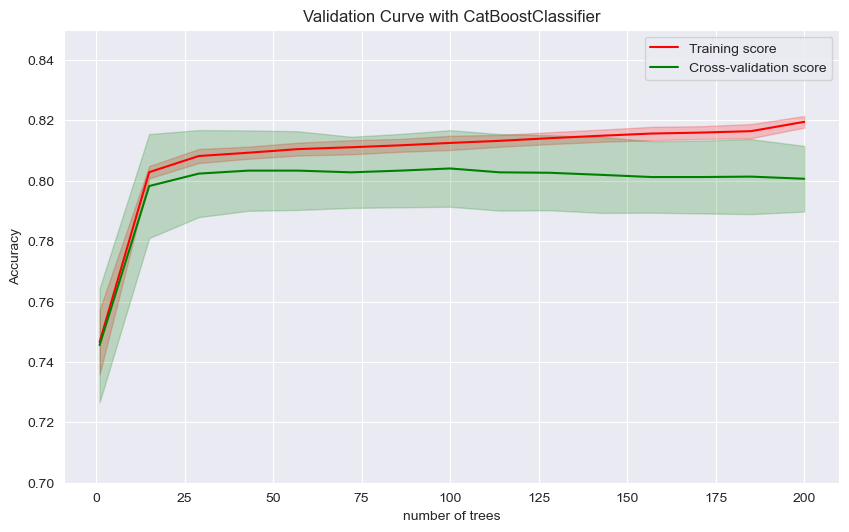

Best cross-validation result (0.80) obtained for 100 trees


In [197]:
train_scores_mean = np.mean(CatBoost_train_scores, axis=1)
train_scores_std = np.std (CatBoost_train_scores, axis=1)
test_scores_mean = np.mean(CatBoost_test_scores, axis=1)
test_scores_std = np.std (CatBoost_test_scores, axis=1)

fig = plt.figure(figsize=(10, 6), dpi=100)

plt.title("Validation Curve with CatBoostClassifier")
plt.xlabel("number of trees")
plt.ylabel("Accuracy")
plt.ylim(0.70, 0.85)

plt.plot(n_estimators_range,
             train_scores_mean,
             label="Training score",
             color="r")

plt.plot(n_estimators_range,
             test_scores_mean, 
             label="Cross-validation score",
             color="g")

plt.fill_between(n_estimators_range, 
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, 
                 alpha=0.2, color="r")

plt.fill_between(n_estimators_range,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2, color="g")

plt.axhline(y=1, color='k', ls='dashed')

plt.legend(loc="best")
plt.show()

i = np.argmax(test_scores_mean)
print("Best cross-validation result ({0:.2f}) obtained for {1} trees".format(test_scores_mean[i], n_estimators_range[i]))

In [198]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from hyperopt import tpe, hp, fmin, STATUS_OK,Trials
from hyperopt.pyll.base import scope
import math

In [199]:
def hyperparameter_tuning(params):
    clf = CatBoostClassifier(**params)
    acc = cross_val_score(clf, X, y, scoring="accuracy").mean()
    return {"loss": -acc, "status": STATUS_OK}

In [200]:
EstimatorsRange=[5, 10, 40, 70,114,140,170,200]
#NumLeavesRange=np.arange(50, 5000, 100, dtype=int)
maxDepthRange=np.arange(1, 12, 3, dtype=int)
space = {
    "iterations": hp.choice("iterations", EstimatorsRange),
    "learning_rate": hp.quniform("learning_rate", 0.01, 0.4, 0.03),
    "l2_leaf_reg": hp.quniform("l2_leaf_reg", 0.5, 5.5, 0.5),
    "depth": hp.choice("depth",maxDepthRange),
    "verbose":False
}

trials = Trials()

t = time.time()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=Global_Max_evals, 
    trials=trials
)
elapsed = time.time() - t
    
print("Result of the First round of optimisation:")
print("Best: {}".format(best))

print("learning_rate:",best["learning_rate"])
print("n_estimators:",EstimatorsRange[best["iterations"]])
print("l2_leaf_reg:",best["l2_leaf_reg"])
print("max_depth:",maxDepthRange[best["depth"]])
print("in time = {0:.2f} seconds".format(elapsed))
print("Accuracy = {0:.4f}".format(-np.min([x for x in trials.losses() if math.isnan(x) == False])))

100%|██████████| 240/240 [06:43<00:00,  1.68s/trial, best loss: -0.807042994709336] 
Result of the First round of optimisation:
Best: {'depth': 1, 'iterations': 3, 'l2_leaf_reg': 5.5, 'learning_rate': 0.21}
learning_rate: 0.21
n_estimators: 70
l2_leaf_reg: 5.5
max_depth: 4
in time = 403.01 seconds
Accuracy = 0.8070


In [201]:
calcRoundTwo=[0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3]
EstimatorsRangeTwo=[int(x * EstimatorsRange[best["iterations"]]) for x in calcRoundTwo]
Learning_rateRangeTwo=[x * best["learning_rate"] for x in calcRoundTwo]
l2_leaf_regRangeTwo=[x * best["l2_leaf_reg"] for x in calcRoundTwo]
maxDepthRangeTwo=[int(x * maxDepthRange[best["depth"]])+1 for x in calcRoundTwo]
maxDepthRangeTwo=[x+1 if np.min(maxDepthRangeTwo) == 0 else x for x in maxDepthRangeTwo]
maxDepthRangeTwo = list(dict.fromkeys(maxDepthRangeTwo))

print("n_estimators",EstimatorsRangeTwo,  "\nlearning_rate",Learning_rateRangeTwo,
      "\nsubsample",SubsampleRangeTwo,   "\nmax_depth",maxDepthRangeTwo)

n_estimators [49, 56, 63, 70, 77, 84, 91] 
learning_rate [0.147, 0.168, 0.189, 0.21, 0.231, 0.252, 0.273] 
subsample [0.27999999999999997, 0.32000000000000006, 0.36000000000000004, 0.4, 0.44000000000000006, 0.48, 0.52] 
max_depth [3, 4, 5, 6]


In [202]:
space = {
    "iterations": hp.choice("iterations", EstimatorsRangeTwo),
    "learning_rate": hp.choice("learning_rate", Learning_rateRangeTwo),
    "l2_leaf_reg": hp.choice("l2_leaf_reg", l2_leaf_regRangeTwo),
    "depth": hp.choice("depth",maxDepthRangeTwo),
    "verbose":False
}
trials = Trials()

t = time.time()

best = fmin(
    fn=hyperparameter_tuning,
    space = space, 
    algo=tpe.suggest, 
    max_evals=Global_Max_evals, 
    trials=trials
)
elapsed = time.time() - t
    
print("Result of the Second round of optimisation\nBest: {}".format(best))

print("learning_rate:",Learning_rateRangeTwo[best["learning_rate"]])
print("n_estimators:",EstimatorsRangeTwo[best["iterations"]])
print("l2_leaf_reg:",l2_leaf_regRangeTwo[best["l2_leaf_reg"]])
print("max_depth:",maxDepthRangeTwo[best["depth"]])
print("in time = {0:.2f} seconds".format(elapsed))
print("Accuracy = {0:.4f}".format(-np.min([x for x in trials.losses() if math.isnan(x) == False])))

CatBoost_otimisation_res={"learning_rate":Learning_rateRangeTwo[best["learning_rate"]],
                        "n_estimators":EstimatorsRangeTwo[best["iterations"]],
                        "l2_leaf_reg":l2_leaf_regRangeTwo[best["l2_leaf_reg"]],
                        "max_depth":maxDepthRangeTwo[best["depth"]],
                        "Accuracy":-np.min([x for x in trials.losses() if math.isnan(x) == False]),
                        "timeOptimisation":elapsed
                     }
print(CatBoost_otimisation_res)

100%|██████████| 240/240 [03:41<00:00,  1.08trial/s, best loss: -0.8073277913091168]
Result of the Second round of optimisation
Best: {'depth': 0, 'iterations': 1, 'l2_leaf_reg': 6, 'learning_rate': 0}
learning_rate: 0.147
n_estimators: 56
l2_leaf_reg: 7.15
max_depth: 3
in time = 221.79 seconds
Accuracy = 0.8073
{'learning_rate': 0.147, 'n_estimators': 56, 'l2_leaf_reg': 7.15, 'max_depth': 3, 'Accuracy': 0.8073277913091168, 'timeOptimisation': 221.7903881072998}


# results

In [238]:
from copy import deepcopy
def dict_of_dicts_merge(x, y):
    z = {}
    overlapping_keys = x.keys() & y.keys()
    for key in overlapping_keys:
        z[key] = [x[key], y[key]]
    for key in x.keys() - overlapping_keys:
        z[key] = deepcopy(x[key])
    for key in y.keys() - overlapping_keys:
        z[key] = deepcopy(y[key])
    return z
def flattenlist(values):
    return [item for sublist in values for item in sublist]
FirstD=dict_of_dicts_merge(LGBM_otimisation_res,CatBoost_otimisation_res)
SecondD=dict_of_dicts_merge(XGBClassifier_otimisation_res,GradientBoosting_otimisation_res)
FinalD=dict_of_dicts_merge(FirstD,SecondD)
FinalD['labels']=[["LGBM","CatBoost"],["XGB","GradientBoosting"]]
flat_keys = flattenlist(FinalD["labels"])
#print(flat_keys)
flat_learning_rate = flattenlist(FinalD["learning_rate"])
#print(flat_learning_rate)
flat_n_estimators = flattenlist(FinalD["n_estimators"])
#print(flat_n_estimators)
flat_subsample =FinalD["subsample"]
#print(flat_subsample)
flat_Accuracy = flattenlist(FinalD["Accuracy"])
#print(flat_Accuracy)
flat_max_depth = flattenlist(FinalD["max_depth"])
#print(flat_max_depth)
flat_timeOptimisation = flattenlist(FinalD["timeOptimisation"])
#print(flat_timeOptimisation)
flat_keys_subsample=['XGB', 'GradientBoosting']
#print(flat_keys_subsample)

Accuracy of all 4 models is identical


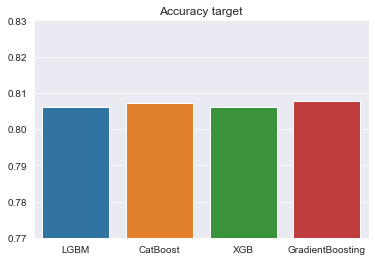

In [277]:
plot=sns.barplot(x=flat_keys, y=flat_Accuracy)
plot.set_title('Accuracy target')
plot.set_ylim(0.77, 0.83)
print("Accuracy of all 4 models is identical")

The fastest GB model is XGB, LMBM was second, 
CatBoost was third.
Results are highly influenced by hyperparameters
All the 240 cycles for XGB were caclulated for 
max_depth parameter value of 1 or 2 
while other models were running test with higher depth


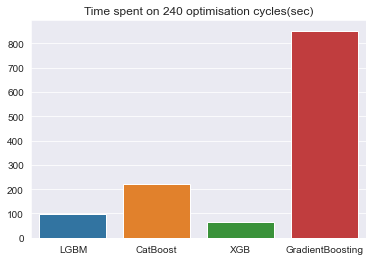

In [280]:
sns.barplot(x=flat_keys, y=flat_timeOptimisation).set_title('Time spent on {0} optimisation cycles(sec)'.format(Global_Max_evals))
print("The fastest GB model is XGB, LMBM was second, \nCatBoost was third.\nResults are highly influenced by hyperparameters")
print("All the {0} cycles for XGB were caclulated for \nmax_depth parameter value of 1 or 2 \nwhile other models were running test with higher values".format(Global_Max_evals))


learning_rate for 4 models differs a lot


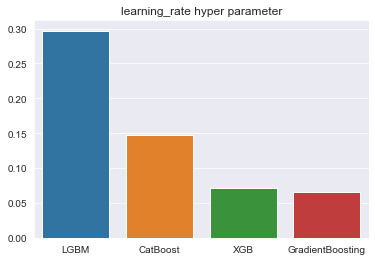

In [281]:
sns.barplot(x=flat_keys, y=flat_learning_rate).set_title('learning_rate hyper parameter')
print("learning_rate for 4 models differs a lot")

Optimized n_estimators value for LGBM and CatBoost was around 70


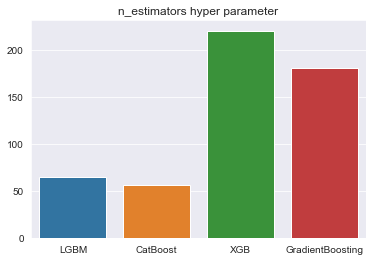

In [282]:
sns.barplot(x=flat_keys, y=flat_n_estimators).set_title('n_estimators hyper parameter')
print("Optimized n_estimators value for LGBM and CatBoost was around 70")

Subsample size was optimised for 2 models, 
it can also explain the fast timing of XGB model


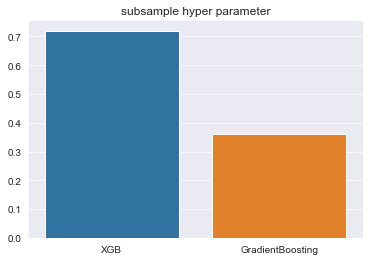

In [283]:
sns.barplot(x=flat_keys_subsample, y=flat_subsample).set_title('subsample hyper parameter')
print("Subsample size was optimised for 2 models, \nit can also explain the fast timing of XGB model")

Optimised value for the depth was under 3 for all the models


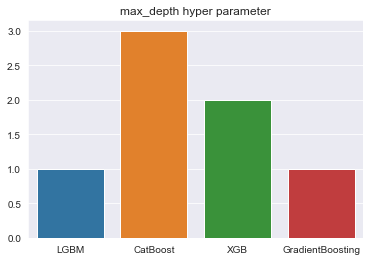

In [284]:
sns.barplot(x=flat_keys, y=flat_max_depth).set_title('max_depth hyper parameter')
print("Optimised value for the depth was under 3 for all the models")